<h1>TP 1 - Grégoire Boussac</h1>

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import sys
import random
import time
from tqdm import tqdm

In [2]:
sys.path.append('TP1_python/')

In [3]:
norm_inf = lambda x: np.linalg.norm(x, ord=np.inf)

<h2>1 - Dynamic programming</h2>

In [4]:
def mdp():
    # action, state, state -> probability
    P = np.zeros((3, 3, 3))

    P[0, 0, 0] = 0.55
    P[0, 0, 1] = 0.45
    P[0, 0, 2] = 0
    P[0, 1, 0] = 1
    P[0, 1, 1] = 0
    P[0, 1, 2] = 0
    P[0, 2, 0] = 0
    P[0, 2, 1] = 1
    P[0, 2, 2] = 0

    P[1, 0, 0] = 0.3
    P[1, 0, 1] = 0.7
    P[1, 0, 2] = 0
    P[1, 1, 0] = 0
    P[1, 1, 1] = 0.4
    P[1, 1, 2] = 0.6
    P[1, 2, 0] = 0
    P[1, 2, 1] = 0.6
    P[1, 2, 2] = 0.4

    P[2, 0, 0] = 1
    P[2, 0, 1] = 0
    P[2, 0, 2] = 0
    P[2, 1, 0] = 0
    P[2, 1, 1] = 1
    P[2, 1, 2] = 0
    P[2, 2, 0] = 0
    P[2, 2, 1] = 0
    P[2, 2, 2] = 1

    # state, action -> reward
    R = np.zeros((3, 3))
    
    R[0, 0] = 0
    R[0, 1] = 0
    R[0, 2] = 5/100
    
    R[1, 0] = 0
    R[1, 1] = 0
    R[1, 2] = 0
    
    R[2, 0] = 0
    R[2, 1] = 1
    R[2, 2] = 9/10

    return P, R

In [5]:
def compute_Q_value_function(Q, R, P):
    Q = R + gamma * np.dot(P, Q).T
    return Q

def compute_optimal_value_function(Q, R, P):
    
    Q = compute_Q_value_function(Q, R, P)
    return np.max(Q, axis=1)

def compute_optimal_policy(Q, R, P):
    
    Q = compute_Q_value_function(Q, R, P)
    return np.argmax(Q, axis=1)

In [6]:
def value_iteration(V0, R, P, eps):
    hist_V = [V0]
    stop = False
    cpt = 0
    
    while not stop:
        hist_V.append(compute_optimal_value_function(hist_V[-1], R, P))

        # Stopping condition
        error = norm_inf(hist_V[-1] - hist_V[-2])
        if (error < eps or cpt>3000):
            stop = True

        cpt += 1

        if not cpt%10:
            print('Iteration {} ; Error = {}'.format(cpt, error))

    # Optimal policy
    greedy_policy = compute_optimal_policy(hist_V[-1], R, P)

    return greedy_policy, hist_V

- Q1)

In [7]:
nb_states = 3
P, R = mdp()
gamma = 0.95
eps = 0.01

In [8]:
V0 = np.ones(nb_states)
t0 = time.time()
greedy_policy, hist_V = value_iteration(V0, R, P, eps)
print('Elapsed time = {} s'.format(time.time()-t0))
print('Optimal policy : ', greedy_policy)

Iteration 10 ; Error = 0.5323948961094729
Iteration 20 ; Error = 0.31876449056272094
Iteration 30 ; Error = 0.19085607541740401
Iteration 40 ; Error = 0.11427258243046623
Iteration 50 ; Error = 0.06841921624328506
Iteration 60 ; Error = 0.04096511211859166
Iteration 70 ; Error = 0.02452732584544215
Iteration 80 ; Error = 0.014685416004404317
Elapsed time = 0.007482051849365234 s
Optimal policy :  [1 1 2]


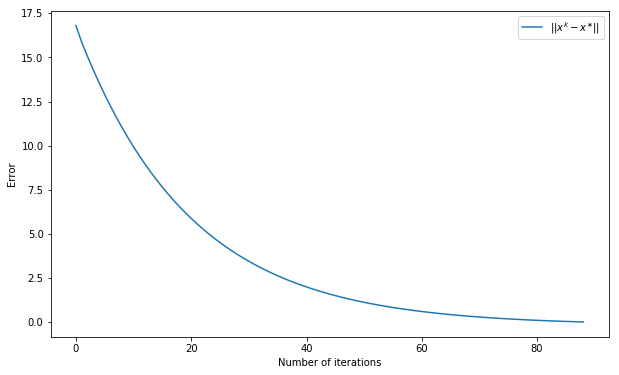

In [9]:
v_star = hist_V[-1]
errors = [norm_inf(v - v_star) for v in hist_V]

plt.figure(figsize=(10,6))
plt.plot(errors, label=r'$||x^k - x^{\ast} ||$')
plt.xlabel('Number of iterations')
plt.ylabel('Error')
plt.legend()
plt.show()

- Q2)

In [10]:
def compute_policy_value(policy, R, P):
    P_policy = np.array([P[policy[x], x, :] for x in range(nb_states)])
    R_policy = np.array([R[x, policy[x]] for x in range(nb_states)])
    
    value_policy = np.linalg.solve((np.identity(P_policy.shape[0]) - gamma*P_policy), R_policy)
    
    return value_policy

def exact_policy_iteration(initial_policy, R, P, eps):
    hist_V = [compute_policy_value(initial_policy, R, P)]
    cpt = 0
    stop = False

    while not stop:            
        greedy_policy = compute_optimal_policy(hist_V[-1], R, P)
        hist_V.append(compute_policy_value(greedy_policy, R, P))
        
        if np.array_equal(hist_V[-1], hist_V[-2]):
            stop = True
            
        cpt += 1

    return greedy_policy, hist_V  

In [11]:
nb_states = 3
P, R = mdp()
gamma = 0.95
eps = 0.01

In [12]:
initial_policy = [0, 0, 0]
t0 = time.time()
greedy_policy, hist_V = exact_policy_iteration(initial_policy, R, P, eps)
print('Elapsed time = {} s'.format(time.time()-t0))
print('Optimal policy : ', greedy_policy)

Elapsed time = 0.0009920597076416016 s
Optimal policy :  [1 1 2]


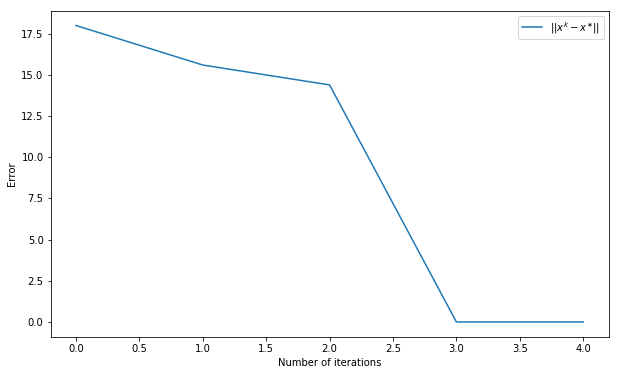

In [13]:
v_star = hist_V[-1]
errors = [np.linalg.norm(v - v_star, np.inf) for v in hist_V]

plt.figure(figsize=(10,6))
plt.plot(errors, label=r'$||x^k - x^{\ast} ||$')
plt.xlabel('Number of iterations')
plt.ylabel('Error')
plt.legend()
plt.show()

<h2>2 - Reinforcement Learning</h2>

- Q4)

In [14]:
v_q4 = [0.87691855, 0.92820033, 0.98817903, 0.00000000, 0.67106071, -0.99447514, 0.00000000, -0.82847001, -0.87691855,
        -0.93358351, -0.99447514]

In [15]:
from gridworld import *

In [16]:
# Define the grid world
grid = [
    ['', '', '', 1],
    ['', 'x', '', -1],
    ['', '', '', '']
]
env = GridWorld(gamma=0.95, grid=grid)

In [17]:
# Define the determinictic policy "right when available, otherwise up."
initial_policy = [0, 0, 0, 0, 3, 0, 0, 0, 0, 0, 3]

In [18]:
delta = 1e-1
gamma = 0.95
Tmax = int(round(-np.log10(delta/1) / (1-gamma))) # R_Max = 1
n = int(1e4) # Total number of trajectories

In [22]:
def compute_Vn(env, n, normalize=True):
    
    n_states = env.n_states
    n_actions = len(env.action_names)
    available_actions = env.state_actions
    
    N = np.zeros((n_states, n_actions))
    Vk = np.zeros((n_states, n_actions))

    # n trajectories in total
    for k in range(n):

        t=1
        s1 = env.reset()
        a1 = np.random.choice(available_actions[s1])
        N[s1, a1] += 1

        next_state = s1
        absorb = False

        while not absorb and t < Tmax:

            action = initial_policy[next_state]
            next_state, reward, absorb = env.step(next_state, action)
            Vk[s1, a1] +=  reward * ( env.gamma**(t-1) )

            t+=1
            
    if normalize:
        Vn = np.nanmax(Vk / N, axis=1)
    else:
        Vn = Vk
        
    return Vn, N

In [23]:
def policy_evaluation(env):
    env.render = False

    hist_V = []

    Nmax = 2000

    for n in range(1, Nmax, 10):
        if not (n-1)%200:
            print('>> Iteration {}/{}'.format(n-1, Nmax))
        
        Vn, N = compute_Vn(env, n, False)
        
        # Memorize this approximation
        hist_V.append(np.nanmax(Vn / N, axis=1))
    
    print('... Done')
    
    return hist_V, N

In [24]:
hist_V, N = policy_evaluation(env)

>> Iteration 0/2000


/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:15: RuntimeWarning: invalid value encountered in true_divide
  from ipykernel import kernelapp as app
/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:15: RuntimeWarning: All-NaN slice encountered
  from ipykernel import kernelapp as app


>> Iteration 200/2000
>> Iteration 400/2000
>> Iteration 600/2000
>> Iteration 800/2000
>> Iteration 1000/2000
>> Iteration 1200/2000
>> Iteration 1400/2000
>> Iteration 1600/2000
>> Iteration 1800/2000
... Done


In [25]:
# Compute N with a large value of n, for more accuracy
V_large, N_large = compute_Vn(env, 10000, True)

/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:30: RuntimeWarning: invalid value encountered in true_divide


- Approximation of $\mu_0$ :

In [26]:
def compute_mu0(N):
    return [np.sum(N[i,:])/n for i in range(n_states)]

In [27]:
def compute_J(V, mu0):
    return np.sum(mu0_approx[s]*V[s] for s in range(n_states))

In [30]:
n_states = env.n_states
n_actions = len(env.action_names)
available_actions = env.state_actions

In [31]:
# Estimate mu0 via Monte-carlo, based on the last estimation of the matrix N
mu0_approx = compute_mu0(N_large)

J_pi = compute_J(v_q4, mu0_approx)

gaps = []

for Vk in hist_V:
    gaps.append(compute_J(Vk, mu0_approx)-J_pi)

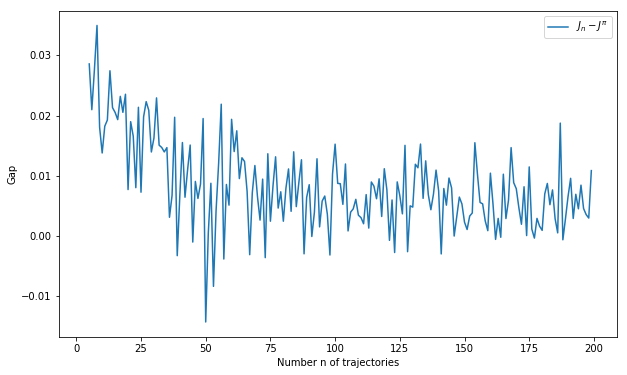

In [32]:
plt.figure(figsize=(10,6))
plt.plot(gaps, label=r'$J_n-J^{\pi}$')
plt.xlabel('Number n of trajectories')
plt.ylabel('Gap')
plt.legend()
plt.show()

- Q5)

In [33]:
v_opt = [0.87691855, 0.92820033, 0.98817903, 0.00000000, 0.82369294, 0.92820033, 0.00000000, 0.77818504, 0.82369294,
         0.87691855, 0.82847001]

In [38]:
def get_greedy_action(env, Q, state, eps):
    
    if random.random() < eps:
        state_available_actions = env.state_actions[state]
        action = np.random.choice(state_available_actions)
    else:
        action = np.nanargmax(Q[state])
        
    return action



def Q_learning(env, n, Tmax, eps, alpha):
    
    env.render = False    

    hist_greedy_policy = []
    hist_V = []
    hist_cumulated_reward = []
    cumulated_reward = 0

    n_actions = len(env.action_names)
    n_states = env.n_states
    
    # Initialize Q to zero
    Q = np.zeros((n_states, n_actions))
    
    # Set value of non-feasible states with np.nan
    for s in range(n_states):
        forbidden_actions = [i for i in range(n_actions) if i not in env.state_actions[s]]
        Q[s, forbidden_actions] = np.nan
    
    # Loop over trajectories
    for i in range(n):
        
        current_state = env.reset()
        
        absorb = False
        stop = False
        t = 1
        
        while t < Tmax and not stop:
            if absorb:

                hist_V.append(np.nanmax(Q, axis=1))
                
                
                hist_greedy_policy.append(np.nanargmax(Q, axis=1))
                
                hist_cumulated_reward.append(cumulated_reward)
                
                stop = True
            
            else:
                action = get_greedy_action(env, Q, current_state, eps)  
                
                next_state, reward, absorb = env.step(current_state, action)
                
                update = reward + env.gamma * np.nanmax(Q[next_state]) - Q[current_state][action]
                
                cumulated_reward += reward
                
                Q[current_state][action] += alpha * update
                
                current_state = next_state
            t+=1

    return Q, hist_V, hist_greedy_policy, hist_cumulated_reward

<h2>Experiments</h2>

- Influence of epsilon on the cumulated rewards

In [43]:
# Run the Q learning algorithm for different values of epsilon
n = 5000
alpha = 0.1

values_eps = 0.05 * np.array(range(21))

best_cumulated_rewards = []
best_value_functions = []

print('>> Running Q-learning algorithm for different values of epsilon')

for eps in values_eps:
    _, hist_V, _, hist_cumulated_reward = Q_learning(env, n, Tmax, eps, alpha)
    
    best_cumulated_rewards.append(hist_cumulated_reward[-1])
    best_value_functions.append(hist_V[-1])
    
print('... Done')

>> Running Q-learning algorithm for different values of epsilon
... Done


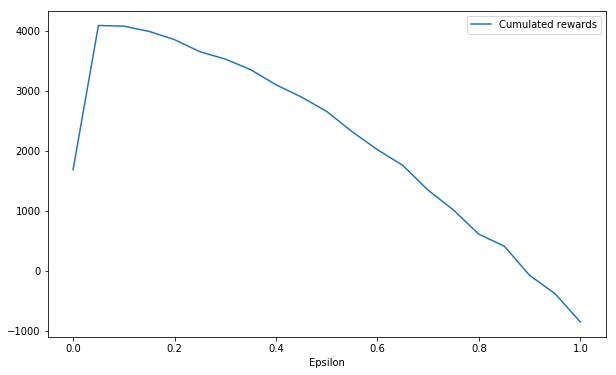

In [44]:
# Plot the convergence of the Q learning algorithm
plt.figure(figsize=(10,6))
plt.plot(values_eps, best_cumulated_rewards, label='Cumulated rewards')
plt.xlabel("Epsilon")
plt.legend()
plt.show()

- Influence of alpha on the cumulated rewards

In [45]:
n = 5000
eps = 0.1

values_alpha = 0.1 * np.array(range(11))

best_cumulated_rewards = []
best_value_functions = []

print('>> Running Q-learning algorithm for different values of epsilon')

for alpha in values_alpha:
    _, hist_V, _, hist_cumulated_reward = Q_learning(env, n, Tmax, eps, alpha)
    
    best_cumulated_rewards.append(hist_cumulated_reward[-1])
    best_value_functions.append(hist_V[-1])
    
print('... Done')

>> Running Q-learning algorithm for different values of epsilon
... Done


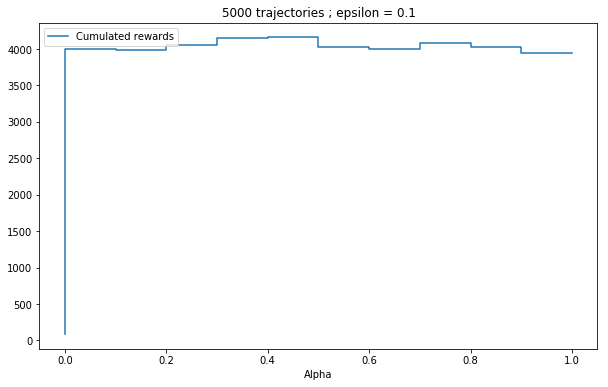

In [46]:
# Plot the convergence of the Q learning algorithm
plt.figure(figsize=(10,6))
plt.step(values_alpha, best_cumulated_rewards, label='Cumulated rewards')
plt.xlabel("Alpha")
plt.title('5000 trajectories ; epsilon = 0.1')
plt.legend()
plt.show()

* Plot convergence of the algorithm

In [47]:
n = 10000
eps = 0.1
alpha = 1e-2
_, hist_V, _, _ = Q_learning(env, n, Tmax, eps, alpha)
print('... Done')

... Done


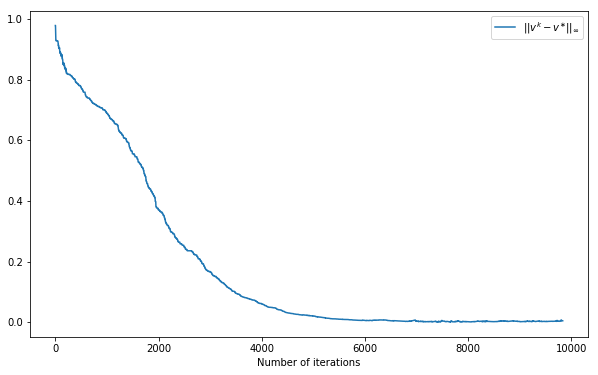

In [48]:
# Plot the convergence of the Q learning algorithm
plt.figure(figsize=(10,6))
gaps = [norm_inf(V-v_opt) for V in hist_V]
plt.plot(gaps, label=r'$||v^k - v^{\ast}||_{\infty}$')
plt.xlabel("Number of iterations")
plt.legend()
plt.show()